# PUMP IT UP: DATA MINING THE WATER TABLE

### Data Loading and Visualization:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Reading and merging CSV files
values_df = pd.read_csv('training_values.csv')
labels_df = pd.read_csv('training_labels.csv')
test_df = pd.read_csv('testset.csv')

# Merging the DataFrames values_df and labels_df using the 'id' column
df = pd.merge(values_df, labels_df, on='id')

df.head()


C:\Users\Yuriy Popryshko\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

We obtain the following information: there is a total of 59,400 rows and 41 columns in the DataFrame.
Each row has a numerical index (Int64Index) ranging from 0 to 59,399.

The columns represent different attributes or features of the data among which are particularly relevant:

"id": A unique identifier for each entry in the dataset.
"amount_tsh": A numerical amount in floating point.
"date_recorded": A date recorded in text format.
"funder", "installer", "subvillage", "scheme_management", "scheme_name", "permit": Columns containing information about who funded, installed, the name of the scheme, and other details related to the wells.
"longitude" and "latitude": Geographic coordinates of location.
"population": Number of people in the well's area.
"status_group": The target column indicating the well's status, i.e., if it's functioning, needs repair, or is not functioning.

We can also identify the data type in each column (Dtype) and the count of non-null values (Non-Null Count) in those columns."




In [3]:
#To understand the composition of the DataFrame
dtype_counts = df.dtypes.value_counts()

print("Count of columns by dtype:")
print(dtype_counts)

Count of columns by dtype:
object     31
int64       7
float64     3
Name: count, dtype: int64


There are a total of 31 columns containing "object" type data (text or categorical data, such as names, labels, or categories).
There are a total of 7 columns containing "int64" type data (integer numbers).
There are a total of 3 columns containing "float64" type data (decimal numbers).

We observe that our text data is quite numerous. To facilitate their treatment, we will convert them into numerical data.

In [4]:
#Identify columns with missing values in the data
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [5]:
# Now, we will replace values equal to 0.0 in the columns "gps_height", "population", and "amount_tsh" with "NaN" (Not a Number) 
# Then count the number of null values in the DataFrame.
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df.isnull().sum()

id                           0
amount_tsh               41639
date_recorded                0
funder                    3637
gps_height               20438
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

We will take the columns with the highest number of nulls and fill them with the mean/median.

We will separate the nulls by zones and complete them. We will go from larger to smaller dimensions and fill the gaps with the mean for a transformation more aligned with the location.

In [6]:
# Fill missing values in the 'gps_height' column with the mean of 'gps_height' grouped by 'region' and 'district_code'.
df["gps_height"].fillna(df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
# Fill remaining missing values in the 'gps_height' column with the mean of 'gps_height' grouped by 'region'.
df["gps_height"].fillna(df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
# Fill remaining missing values in the 'gps_height' column with the mean of 'gps_height' for the entire column.
df["gps_height"].fillna(df["gps_height"].mean(), inplace=True)

In [7]:
# Fill missing values in the 'population' column with the median of 'population' grouped by 'region' and 'district_code'.
df["population"].fillna(df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
# Fill remaining missing values in the 'population' column with the median of 'population' grouped by 'region'.
df["population"].fillna(df.groupby(['region'])["population"].transform("median"), inplace=True)
# Fill remaining missing values in the 'population' column with the median of 'population' for the entire column.
df["population"].fillna(df["population"].median(), inplace=True)

In [8]:
# Fill missing values in the 'amount_tsh' column with the median of 'amount_tsh' grouped by 'region' and 'district_code'.
df["amount_tsh"].fillna(df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
# Fill missing values in the 'amount_tsh' column with the median of 'amount_tsh' grouped by 'region'.
df["amount_tsh"].fillna(df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
# Fill remaining missing values in the 'amount_tsh' column with the median of 'amount_tsh' for the entire column.
df["amount_tsh"].fillna(df["amount_tsh"].median(), inplace=True)

In [9]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

We apply the same approach for latitude, longitude, and construction year.

In [10]:
df['longitude'].replace(0.0, np.nan, inplace=True)
df['latitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)

In [11]:
df["latitude"].fillna(df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region'])["longitude"].transform("mean"), inplace=True)

In [12]:
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)


In [13]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Next, with the "date_recorded" column, we'll transform the date formatted as yyyy-mm-dd. We'll remove the hyphens and keep only the year part.

In [14]:
df.date_recorded = df["date_recorded"].str.replace("-","")

In [15]:
df.date_recorded = df.date_recorded.str[:4]
print(df['date_recorded'].unique())

['2011' '2013' '2012' '2004' '2002']


In [16]:
df.date_recorded = df["date_recorded"].astype(int)
df.date_recorded.info()

<class 'pandas.core.series.Series'>
RangeIndex: 59400 entries, 0 to 59399
Series name: date_recorded
Non-Null Count  Dtype
--------------  -----
59400 non-null  int32
dtypes: int32(1)
memory usage: 232.2 KB


We are left with 7 columns that contain null values. One of them, "scheme_name," has a significant number of nulls.

In [17]:
print(df['scheme_name'].head(10))

0                          Roman
1                            NaN
2    Nyumba ya mungu pipe scheme
3                            NaN
4                            NaN
5                      Zingibali
6                            NaN
7                            NaN
8                            NaN
9                            NaN
Name: scheme_name, dtype: object


The information it contains is quite complex. We will delete this column

In [18]:
df.drop('scheme_name',axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int32  
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  float64
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The remaining columns with nulls are all text-based. We will fill the nulls with "N/A".

We will apply the same changes to test_df.

In [20]:
test_df['gps_height'].replace(0.0, np.nan, inplace=True)
test_df['population'].replace  (0.0, np.nan, inplace=True)
test_df['amount_tsh'].replace (0.0, np.nan, inplace=True)
test_df.isnull().sum()

test_df["gps_height"].fillna(test_df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
test_df["gps_height"].fillna(test_df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
test_df["gps_height"].fillna(test_df["gps_height"].mean(), inplace=True)

test_df["population"].fillna(test_df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
test_df["population"].fillna(test_df.groupby(['region'])["population"].transform("median"), inplace=True)
test_df["population"].fillna(test_df["population"].median(), inplace=True)

test_df["amount_tsh"].fillna(test_df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
test_df["amount_tsh"].fillna(test_df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
test_df["amount_tsh"].fillna(test_df["amount_tsh"].median(), inplace=True)

test_df['longitude'].replace(0.0, np.nan, inplace=True)
test_df['latitude'].replace(0.0, np.nan, inplace=True)
test_df['construction_year'].replace(0.0, np.nan, inplace=True)

test_df["latitude"].fillna(test_df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
test_df["longitude"].fillna(test_df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
test_df["longitude"].fillna(test_df.groupby(['region'])["longitude"].transform("mean"), inplace=True)

test_df["construction_year"].fillna(test_df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
test_df["construction_year"].fillna(test_df["construction_year"].median(), inplace=True)


We will transform the 'date_recorded' column from a date format with hyphens into a format containing only the year as a four-digit string. We do this to analyze the data based on years rather than complete dates.


In [21]:
test_df.date_recorded = test_df["date_recorded"].str.replace("-","")
test_df.date_recorded = test_df.date_recorded.str[:4]
print(test_df['date_recorded'].unique())

['2013' '2011' '2012' '2004' '2001']


In [22]:
test_df.date_recorded = test_df["date_recorded"].astype(int)
test_df.date_recorded.info()

<class 'pandas.core.series.Series'>
RangeIndex: 14850 entries, 0 to 14849
Series name: date_recorded
Non-Null Count  Dtype
--------------  -----
14850 non-null  int32
dtypes: int32(1)
memory usage: 58.1 KB


In [23]:
test_df.drop('scheme_name',axis=1, inplace=True)

In [24]:
columns_with_null = df.columns[df.isnull().any()] 
df[columns_with_null] = df[columns_with_null].fillna("N/A")

In [25]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [26]:
columns_with_null = test_df.columns[test_df.isnull().any()] 
test_df[columns_with_null] = test_df[columns_with_null].fillna("N/A")

In [27]:
test_df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

Although we still need to convert text columns to numerical ones, let's proceed with the Charts.

## Charts:

Distributions:

1. By labels:

C:\Users\Yuriy Popryshko\AppData\Local\Temp\ipykernel_18240\244249351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status_group', palette='Set2')


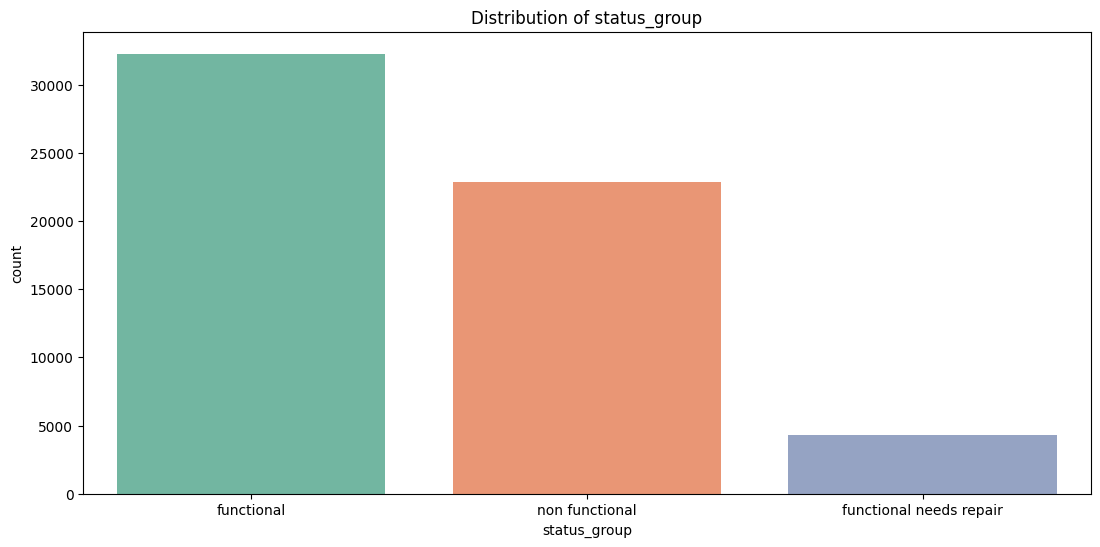

In [28]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='status_group', palette='Set2')
plt.title('Distribution of status_group')
plt.show()


2. By year of entry:

C:\Users\Yuriy Popryshko\AppData\Local\Temp\ipykernel_18240\139003929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='date_recorded', palette='Set2')


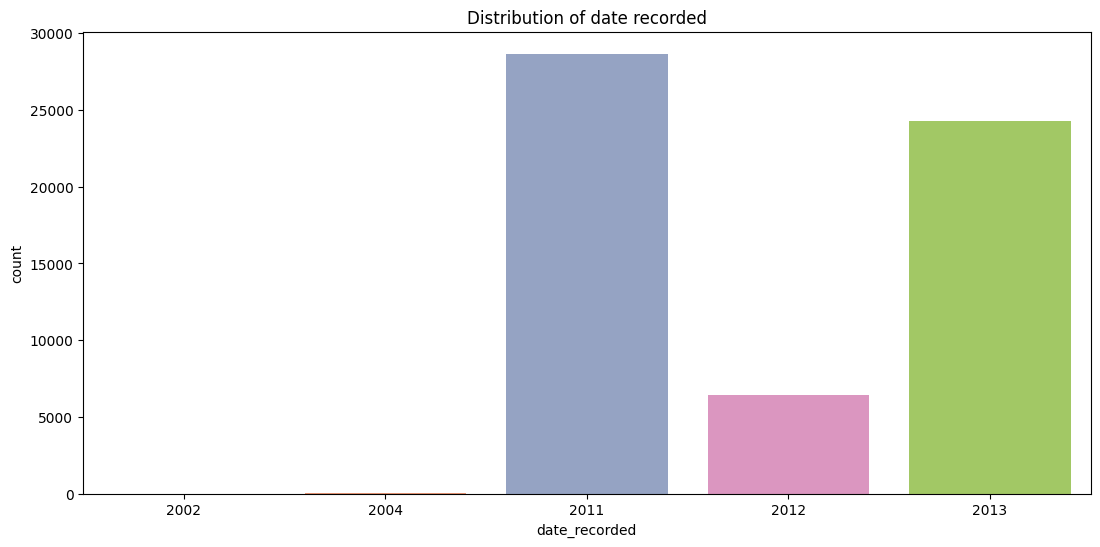

In [29]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='date_recorded', palette='Set2')
plt.title('Distribution of date recorded')
plt.show()


3. By year of construction:

C:\Users\Yuriy Popryshko\AppData\Local\Temp\ipykernel_18240\4201770797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='construction_year', palette='Set2', order=df['construction_year'].value_counts().index)


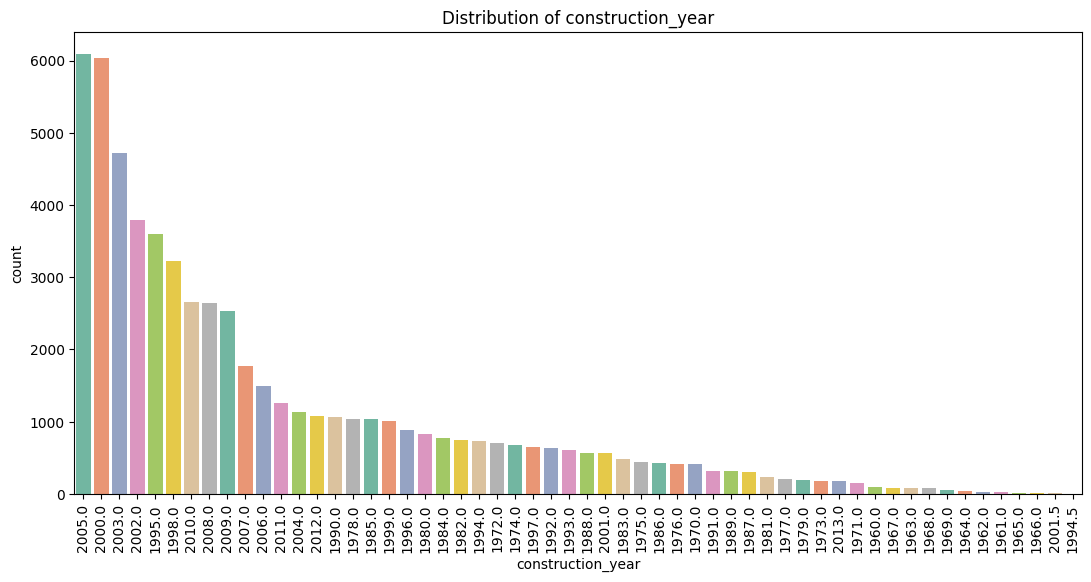

In [30]:
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='construction_year', palette='Set2', order=df['construction_year'].value_counts().index)
plt.title('Distribution of construction_year')
plt.xticks(rotation=90)
plt.show()



Counts

Count of Status by different features:

1. Status by year of construction:

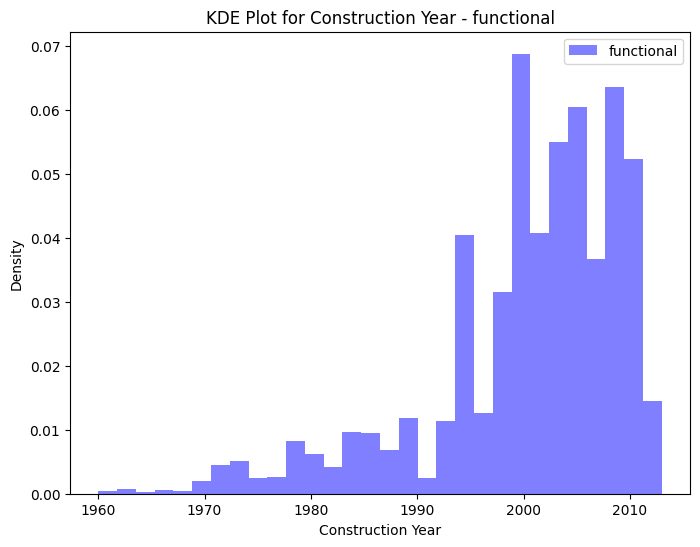

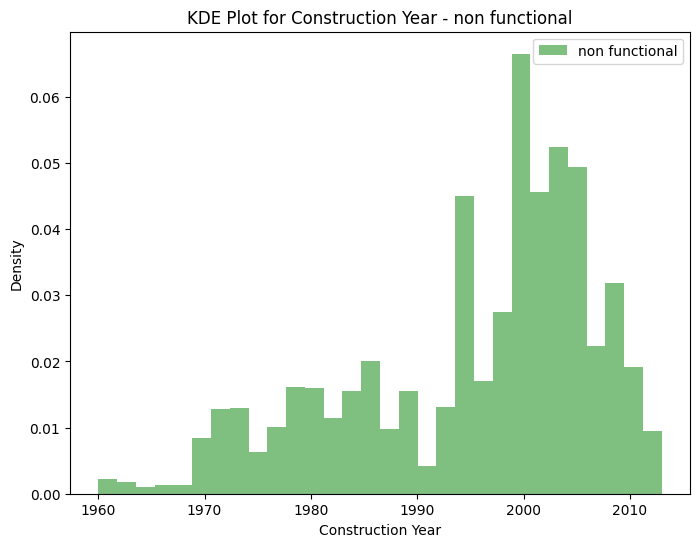

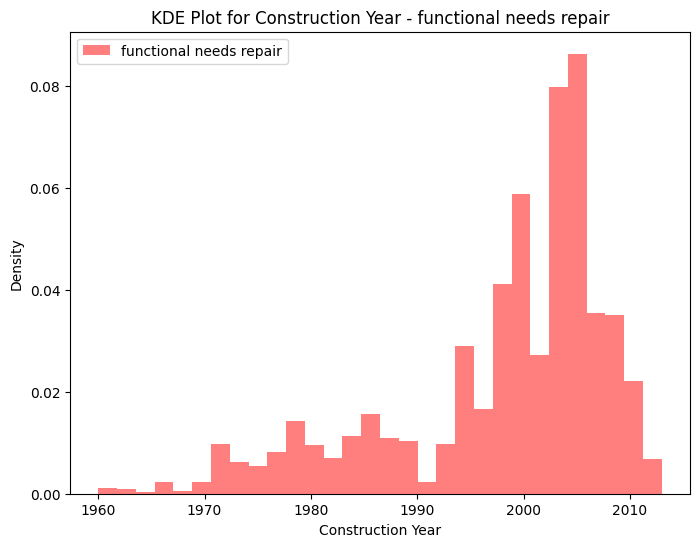

In [31]:
colors = ['blue', 'green', 'red']

groups = df['status_group'].unique()

for i, group in enumerate(groups):
    data = df[df['status_group'] == group]['construction_year']
    plt.figure(figsize=(8, 6))
    plt.title(f"KDE Plot for Construction Year - {group}")
    plt.hist(data, density=True, bins=30, alpha=0.5, label=group, color=colors[i % len(colors)])  
    plt.xlabel('Construction Year')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

2. Status by year of registration:

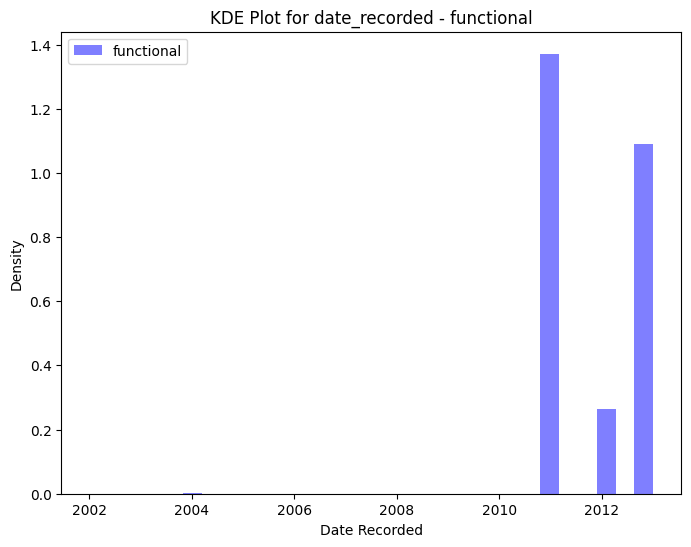

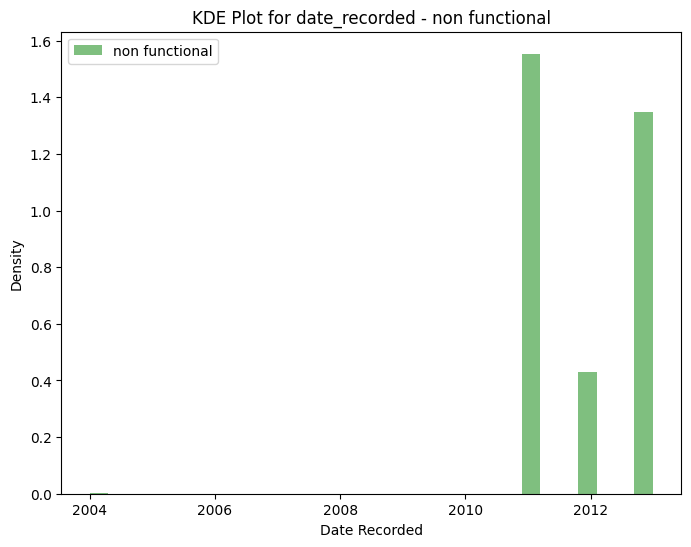

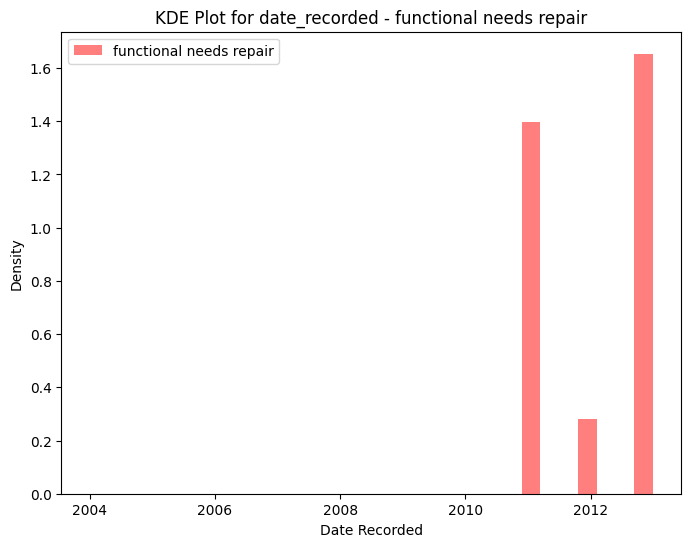

In [32]:
for group in groups:
    plt.figure(figsize=(8, 6))
    plt.title(f"KDE Plot for date_recorded - {group}")
    data = df[df['status_group'] == group]['date_recorded']
    plt.hist(data, density=True, bins=30, alpha=0.5, label=group, color=colors[groups.tolist().index(group) % len(colors)])
    plt.xlabel('Date Recorded')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

3. Status por región:

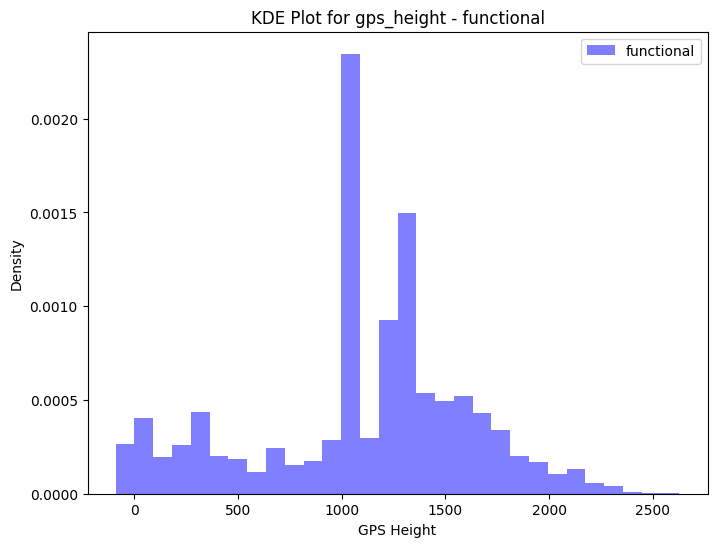

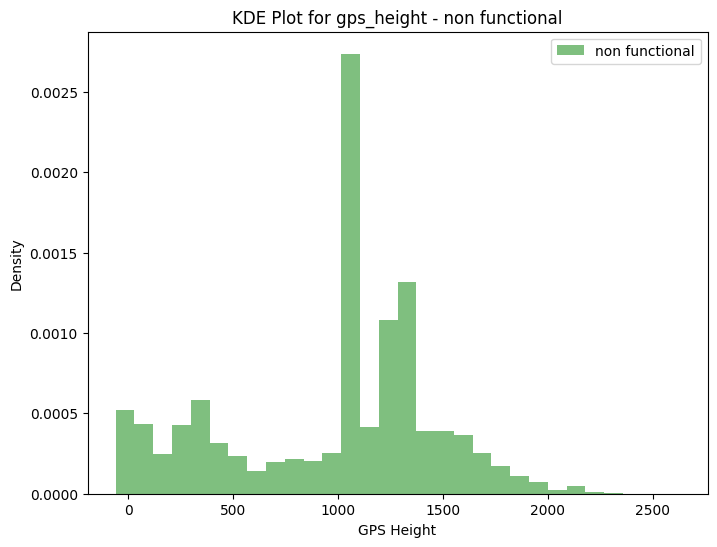

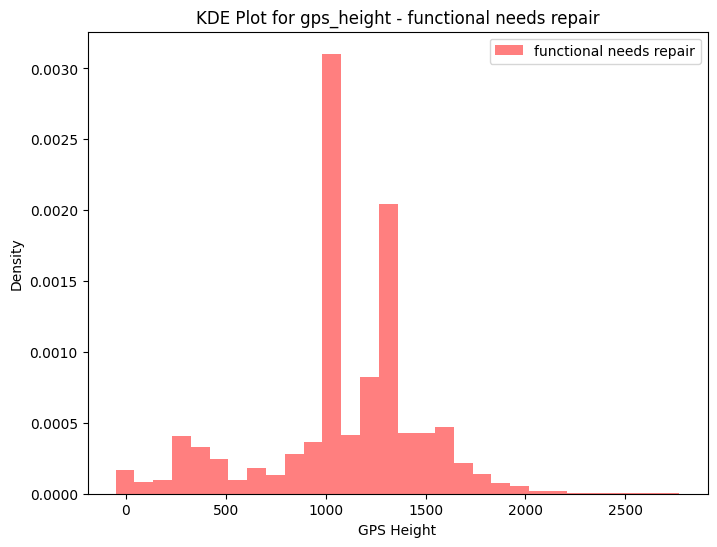

In [33]:
for group in groups:
    plt.figure(figsize=(8, 6))
    plt.title(f"KDE Plot for gps_height - {group}")
    data = df[df['status_group'] == group]['gps_height']
    plt.hist(data, density=True, bins=30, alpha=0.5, label=group, color=colors[groups.tolist().index(group) % len(colors)])
    plt.xlabel('GPS Height')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


We're going to finish transforming the variables that were text into numerical ones.

In [34]:
df.groupby("permit") ['permit'].count()

permit
False    17492
True     38852
N/A       3056
Name: permit, dtype: int64

These two columns don't seem to add value to the model. Also, I'm having issues with processing.

In [35]:
df.drop('public_meeting', axis=1, inplace=True)
df.drop('permit', axis=1, inplace=True)

In [36]:
# We select all columns in the DataFrame 'df' that have the data type 'object'.
object_columns = df.select_dtypes(include=['object'])
# We apply a transformation function to all cells in the selected columns to convert the text to lowercase.
df[object_columns.columns] = object_columns.applymap(lambda x: x.lower())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int32  
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  float64
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [38]:
from sklearn.preprocessing import OrdinalEncoder

To handle the text columns, we'll use the 'OrdinalEncoder' function to convert them into numerical values

In [39]:

object_columns = df.select_dtypes(include=['object'])


column_to_exclude = 'status_group'


selected_columns = object_columns.drop(columns=[column_to_exclude])



In [40]:
enc = OrdinalEncoder()

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.status_group = le.fit_transform(df.status_group)
df.status_group

0        0
1        0
2        0
3        2
4        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group, Length: 59400, dtype: int32

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int32  
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  float64
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [43]:
object_columns = df.select_dtypes(include=['object'])

In [44]:
df[object_columns.columns] = enc.fit_transform(object_columns)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int32  
 3   funder                 59400 non-null  float64
 4   gps_height             59400 non-null  float64
 5   installer              59400 non-null  float64
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  float64
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  float64
 11  subvillage             59400 non-null  float64
 12  region                 59400 non-null  float64
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

First, we converted 'status_group' into a number using a LabelEncoder, and then with an OrdinalEncoder, we transformed all text columns into numerical ones.

We apply the same changes to the test

In [46]:
test_df.drop('public_meeting', axis=1, inplace=True)
test_df.drop('permit', axis=1, inplace=True)

object_columns = test_df.select_dtypes(include=['object'])
test_df[object_columns.columns] = object_columns.applymap(lambda x: x.lower())

object_columns = test_df.select_dtypes(include=['object'])

test_df[object_columns.columns] = enc.fit_transform(object_columns)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  int32  
 3   funder                 59400 non-null  float64
 4   gps_height             59400 non-null  float64
 5   installer              59400 non-null  float64
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  float64
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  float64
 11  subvillage             59400 non-null  float64
 12  region                 59400 non-null  float64
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [48]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
scheme_management        0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
s

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  int32  
 3   funder                 14850 non-null  float64
 4   gps_height             14850 non-null  float64
 5   installer              14850 non-null  float64
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  float64
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  float64
 11  subvillage             14850 non-null  float64
 12  region                 14850 non-null  float64
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [50]:
test_df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
scheme_management        0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
d

## Now that we've finished the transformation on both DataFrames, let's proceed with the model.

<Axes: >

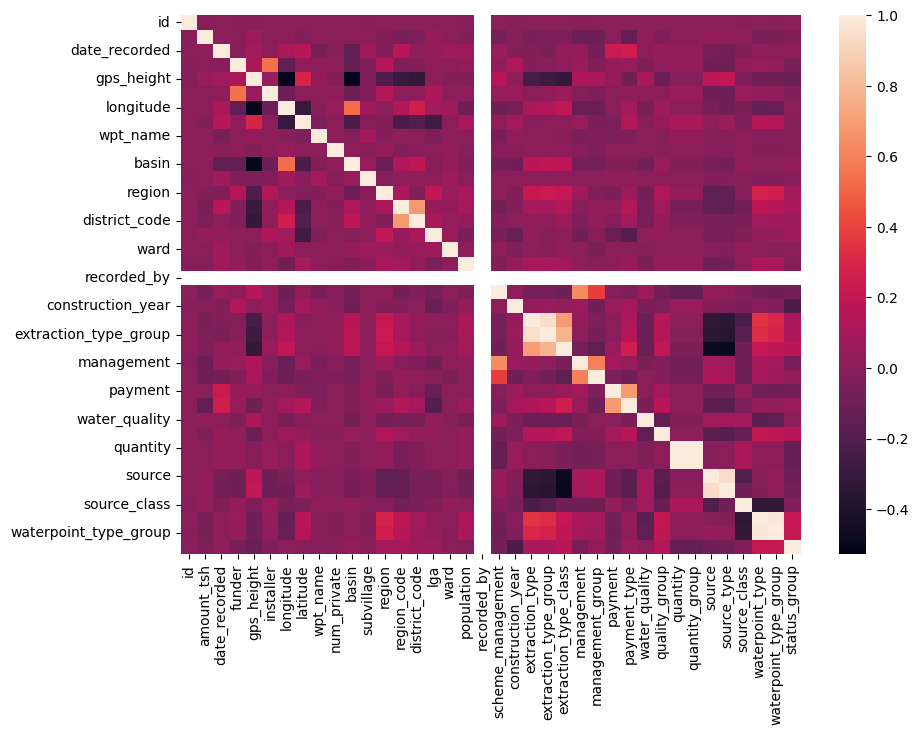

In [51]:
plt.figure(figsize=(10,7))
cmap=df.corr()
sns.heatmap(cmap)

In [52]:
df.drop('recorded_by', axis=1, inplace=True)
test_df.drop('recorded_by', axis=1, inplace=True)

<Axes: >

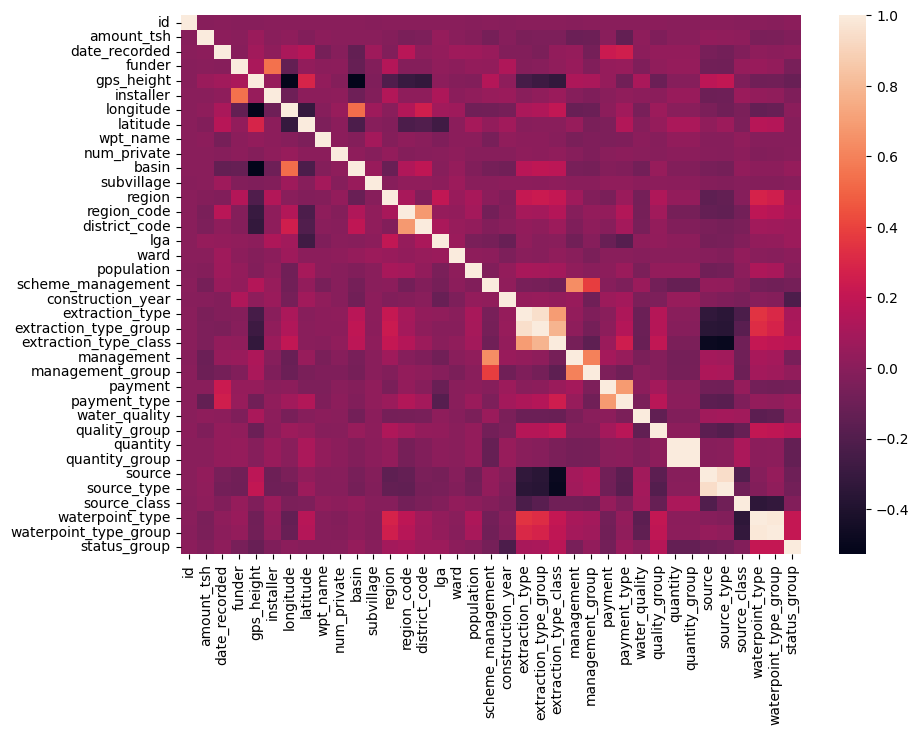

In [53]:
plt.figure(figsize=(10,7))
cmap=df.corr()
sns.heatmap(cmap)

In [54]:
from sklearn.model_selection import train_test_split
y = df["status_group"]
X = df.drop(['id', 'status_group'], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.10, stratify=y, shuffle=True)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train)                                                 

class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6137843144008542, 1: 4.586872586872587, 2: 0.8674909940609483}

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

In [60]:
start_time = time.time()
model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1900, random_state=1,
                                                                 class_weight=class_weights)).fit(X_train, y_train)
print(model.score(X_test, y_test))
end_time = time.time()  
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.4f} seconds")


0.8196969696969697
Time taken: 169.5219 seconds


In [61]:
X_pred = test_df.drop(['id'], axis=1)
X_pred = scaler.transform(X_pred)

In [62]:
prediccion = model.predict(X_pred)
prediccion

array([2, 0, 0, ..., 0, 0, 2])

In [63]:
prediccion = le.inverse_transform(prediccion)
prediccion


array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [64]:
final = pd.DataFrame({'id': test_df.id, 'status_group': prediccion})

In [65]:
final.to_csv('final.csv', index=False)